<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Emotion_detection_using_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries to import

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

#Datasets

In [ ]:
anger = pd.read_csv('anger-train.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
fear = pd.read_csv('fear-train.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
joy = pd.read_csv('joy-train.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
sadness = pd.read_csv('sadness-train.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])

In [ ]:
frames = [anger, fear, joy, sadness]
df = pd.concat(frames)
df.head()

,id,text,label,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
#see ratio of total instance of each emotion
df['label'].value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

#Data Visualization

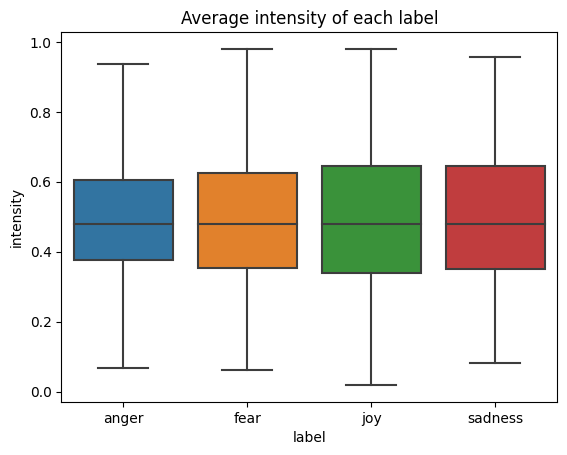

In [ ]:
sns.boxplot(data=df, x='label', y='intensity')
plt.title('Average intensity of each label')
plt.show()

#Label Encoding

In [ ]:
df.replace({'label': {'fear': 0, 'anger': 1, 'joy': 2, 'sadness': 3}}, inplace=True)
df.head()

,id,text,label,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,1,0.938
1,10001,So my Indian Uber driver just called someone t...,1,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,1,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,1,0.896
4,10004,Don't join @BTCare they put the phone down on ...,1,0.896


Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
df['text'] = df['text'].apply(stemming)

In [ ]:
#separating the data and label
x_train = df['text'].values
y_train = df['intensity'].values

In [ ]:
print(x_train)

['fu k heck move fridg knock landlord door angri mad'
 'indian uber driver call someon n word move vehicl jump disgust'
 'dpd uk ask parcel deliv pick store address fume poorcustomerservic' ...
 'silkinsid tommyjoeratliff pretti love sky background purpl highlight dull color great'
 'bluesfestbyron second artist announc look good bluesfest blue music byronbay'
 'liter eat creami pesto pasta top grill chicken sun dri tomato asparagu pine nut everi singl day life']


In [ ]:
print(y_train)

[0.938 0.896 0.896 ... 0.088 0.083 0.083]


In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train)

In [ ]:
print(x_train)

  (0, 4665)	0.27261567944485776
  (0, 4253)	0.29788350563384175
  (0, 3940)	0.3718172721254357
  (0, 3881)	0.3399757320474341
  (0, 3103)	0.3718172721254357
  (0, 2633)	0.3718172721254357
  (0, 2607)	0.3718172721254357
  (0, 1947)	0.3328944148504057
  (0, 275)	0.2398991103966986
  (1, 7963)	0.27534377939259114
  (1, 7651)	0.37325318877648633
  (1, 7488)	0.3538660773797375
  (1, 6639)	0.23708647514676148
  (1, 4665)	0.28375390365775915
  (1, 3719)	0.3207235915403069
  (1, 3395)	0.313352953865367
  (1, 1994)	0.37325318877648633
  (1, 1871)	0.34011070293705575
  (1, 1021)	0.25859902534332113
  (2, 7502)	0.2955273540878636
  (2, 6830)	0.30204907226094035
  (2, 5538)	0.36887633103950473
  (2, 5436)	0.2955273540878636
  (2, 5286)	0.36887633103950473
  (2, 2650)	0.254379806579107
  :	:
  (3611, 2845)	0.21470896079850862
  (3611, 1003)	0.38370389494938023
  (3611, 783)	0.38370389494938023
  (3611, 782)	0.38370389494938023
  (3611, 780)	0.2672393588546676
  (3611, 388)	0.34353671322160556
  (36

#SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [ ]:
#Load data development to test the models
anger_dev = pd.read_csv('anger-dev.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
fear_dev = pd.read_csv('fear-dev.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
joy_dev = pd.read_csv('joy-dev.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
sadness_dev = pd.read_csv('sadness-dev.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])

In [ ]:
frames = [anger_dev, fear_dev, joy_dev, sadness_dev]
df_dev = pd.concat(frames)
df_dev.head()

,id,text,label,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [ ]:
#see ratio of total instance of each emotion
df_dev['label'].value_counts()

fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64

In [ ]:
#Label Encoding
df_dev.replace({'label': {'fear': 0, 'anger': 1, 'joy': 2, 'sadness': 3}}, inplace=True)
df_dev.head()

,id,text,label,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',1,0.479
1,10858,@ArcticFantasy I would have almost took offens...,1,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,1,0.562
3,10860,@CozanGaming that's what lisa asked before she...,1,0.500
4,10861,Sometimes I get mad over something so minuscul...,1,0.708


In [ ]:
df_dev['text'] = df_dev['text'].apply(stemming)

In [ ]:
#separating the data and label
x_dev = df['text'].values
y_dev = df['intensity'].values

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(x_dev)

x_dev = vectorizer.transform(x_dev)

In [ ]:
print(x_dev)

  (0, 4665)	0.27261567944485776
  (0, 4253)	0.29788350563384175
  (0, 3940)	0.3718172721254357
  (0, 3881)	0.3399757320474341
  (0, 3103)	0.3718172721254357
  (0, 2633)	0.3718172721254357
  (0, 2607)	0.3718172721254357
  (0, 1947)	0.3328944148504057
  (0, 275)	0.2398991103966986
  (1, 7963)	0.27534377939259114
  (1, 7651)	0.37325318877648633
  (1, 7488)	0.3538660773797375
  (1, 6639)	0.23708647514676148
  (1, 4665)	0.28375390365775915
  (1, 3719)	0.3207235915403069
  (1, 3395)	0.313352953865367
  (1, 1994)	0.37325318877648633
  (1, 1871)	0.34011070293705575
  (1, 1021)	0.25859902534332113
  (2, 7502)	0.2955273540878636
  (2, 6830)	0.30204907226094035
  (2, 5538)	0.36887633103950473
  (2, 5436)	0.2955273540878636
  (2, 5286)	0.36887633103950473
  (2, 2650)	0.254379806579107
  :	:
  (3611, 2845)	0.21470896079850862
  (3611, 1003)	0.38370389494938023
  (3611, 783)	0.38370389494938023
  (3611, 782)	0.38370389494938023
  (3611, 780)	0.2672393588546676
  (3611, 388)	0.34353671322160556
  (36

#SVM

In [ ]:
y_preds = svm.predict(x_dev)
score = r2_score(y_dev, y_preds)
score

0.8106458635823092

In [ ]:
#Training the final model with the combination of training and development data
combined_training = pd.concat([df[['id', 'text', 'label', 'intensity']], df_dev]).reset_index()
combined_training.shape

(3960, 5)

In [ ]:
combined_training.head()

,index,id,text,label,intensity
0,0,10000,fu k heck move fridg knock landlord door angri...,1,0.938
1,1,10001,indian uber driver call someon n word move veh...,1,0.896
2,2,10002,dpd uk ask parcel deliv pick store address fum...,1,0.896
3,3,10003,ef whichev butt wipe pull fire alarm davi bc s...,1,0.896
4,4,10004,join btcare put phone talk rude take money acc...,1,0.896


In [ ]:
#making a separate model for each emotion

#ANGER
anger = combined_training.loc[combined_training['label']==1]
anger_vectorizer = TfidfVectorizer(max_features=1000)
X_anger = anger_vectorizer.fit_transform(anger['text'])
anger_model = SVR()
anger_model.fit(X_anger, anger['intensity'])

#FEAR
fear = combined_training.loc[combined_training['label']==0]
fear_vectorizer = TfidfVectorizer(max_features=1000)
X_fear = fear_vectorizer.fit_transform(fear['text'])
fear_model = SVR()
fear_model.fit(X_fear, fear['intensity'])

#SADNESS
sad = combined_training.loc[combined_training['label']==3]
sad_vectorizer = TfidfVectorizer(max_features=1000)
X_sad = sad_vectorizer.fit_transform(sad['text'])
sad_model = SVR()
sad_model.fit(X_sad, sad['intensity'])

#JOY
joy = combined_training.loc[combined_training['label']==2]
joy_vectorizer = TfidfVectorizer(max_features=1000)
X_joy = joy_vectorizer.fit_transform(joy['text'])
joy_model = SVR()
joy_model.fit(X_joy, joy['intensity'])

SVR()

#Testing

In [ ]:
#Load data development to test the models
anger_test = pd.read_csv('anger-test.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
fear_test = pd.read_csv('fear-test.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
joy_test = pd.read_csv('joy-test.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])
sadness_test = pd.read_csv('sadness-test.txt', sep='\t', header=None, names=['id', 'text', 'label', 'intensity'])

In [ ]:
#making prediction using the final model

#ANGER
X_anger_test = anger_vectorizer.transform(anger_test['text'])
Y_anger_actual = anger_test['intensity']
Y_anger_predicted = anger_model.predict(X_anger_test)

#FEAR
X_fear_test = fear_vectorizer.transform(fear_test['text'])
Y_fear_actual = fear_test['intensity']
Y_fear_predicted = fear_model.predict(X_fear_test)

#SADNESS
X_sad_test = sad_vectorizer.transform(sadness_test['text'])
Y_sad_actual = sadness_test['intensity']
Y_sad_predicted = sad_model.predict(X_sad_test)

#JOY
X_joy_test = joy_vectorizer.transform(joy_test['text'])
Y_joy_actual = joy_test['intensity']
Y_joy_predicted = joy_model.predict(X_joy_test)

In [ ]:
# Calculate R-squared score
anger_score = r2_score(Y_anger_actual, Y_anger_predicted)
print("Result of Anger Model")
print(anger_score)

Result of Anger Model
0.1435567713757192


In [ ]:
# Calculate R-squared score
fear_score = r2_score(Y_fear_actual, Y_fear_predicted)
print("Result of Fear Model")
print(fear_score)

Result of Fear Model
-0.0485015214331479


In [ ]:
# Calculate R-squared score
joy_score = r2_score(Y_joy_actual, Y_joy_predicted)
print("Result of joy Model")
print(joy_score)

Result of joy Model
0.04517015959669146


In [ ]:
# Calculate R-squared score
sadness_score = r2_score(Y_sad_actual, Y_sad_predicted)
print("Result of sadness Model")
print(sadness_score)

Result of sadness Model
0.1448453863796234


#Evaluation

In [ ]:
#Using the official evalution function
def evaluate(pred,gold):

    # lists storing gold and prediction scores
    gold_scores=[]
    pred_scores=[]

    # lists storing gold and prediction scores where gold score >= 0.5
    gold_scores_range_05_1=[]
    pred_scores_range_05_1=[]

    for p in pred:
        pred_scores.append(p)

    for g in gold:
        gold_scores.append(g)

    for i in range(len(gold_scores)):
        if gold_scores[i] >= 0.5:
            gold_scores_range_05_1.append(gold_scores[i])
            pred_scores_range_05_1.append(pred_scores[i])


    # return zero correlation if predictions are constant
    if np.std(pred_scores)==0 or np.std(gold_scores)==0:
        return (0,0,0,0)


    pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]
    pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]


    return (pears_corr,pears_corr_range_05_1)

In [ ]:
pear_results=[]
spear_results=[]
pear_results_range_05_1=[]
spear_results_range_05_1=[]
num_pairs = 4
argv = ["Anger_Actual", Y_anger_actual, "Anger_Predicted", Y_anger_predicted, "Fear_Actual",Y_fear_actual, "Fear_Predicted",
        Y_fear_predicted, "Sad_Actual", Y_sad_actual, "Sad_Predicted", Y_sad_predicted, "Joy_Actual", Y_joy_actual, "Joy_Predicted", Y_joy_predicted]
for i in range(0,num_pairs*4,4):
    name_gold = argv[i]
    gold=argv[i+1]
    name_pred = argv[i+2]
    pred=argv[i+3]
    result=evaluate(pred,gold)
    print ("Pearson correlation between ", name_pred, " and ", name_gold, ":\t", str(result[0]))
    pear_results.append(result[0])
    print ("Pearson correlation for gold scores in range 0.5-1 between ",name_pred," and ",name_gold,":\t",str(result[1]))
    pear_results_range_05_1.append(result[1])
avg_pear=np.mean(pear_results)
avg_pear_range_05_1=np.mean(pear_results_range_05_1)
print ("Average Pearson correlation:\t",str(avg_pear))
print ("Average Pearson correlation for gold scores in range 0.5-1:\t", str(avg_pear_range_05_1))

Pearson correlation between  Anger_Predicted  and  Anger_Actual :	 0.4044596715363251
Pearson correlation for gold scores in range 0.5-1 between  Anger_Predicted  and  Anger_Actual :	 0.24264957069939963
Pearson correlation between  Fear_Predicted  and  Fear_Actual :	 0.22476603341893395
Pearson correlation for gold scores in range 0.5-1 between  Fear_Predicted  and  Fear_Actual :	 0.1205214007651765
Pearson correlation between  Sad_Predicted  and  Sad_Actual :	 0.3871520469025458
Pearson correlation for gold scores in range 0.5-1 between  Sad_Predicted  and  Sad_Actual :	 0.23668000123059527
Pearson correlation between  Joy_Predicted  and  Joy_Actual :	 0.3180473868255056
Pearson correlation for gold scores in range 0.5-1 between  Joy_Predicted  and  Joy_Actual :	 0.18082497600924358
Average Pearson correlation:	 0.3336062846708276
Average Pearson correlation for gold scores in range 0.5-1:	 0.19516898717610376
